In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

# MNIST数据存放的路径
file = "./MNIST"

# 导入数据
mnist = input_data.read_data_sets(file, one_hot=True)

# 模型的输入和输出
x = tf.placeholder(tf.float32, shape=[None, 784])

y_ = tf.placeholder(tf.float32, shape=[None, 10])
training=tf.placeholder(tf.bool)
# 模型的权重和偏移量
#W = tf.Variable(tf.zeros([784, 10]))
#b = tf.Variable(tf.zeros([10]))
#y = tf.nn.softmax(tf.matmul(x, W) + b)


l1 = tf.layers.dense(x,102,tf.nn.relu)
#l1 = tf.layers.dense(x,1024,tf.nn.relu)
#l1 = tf.layers.dropout(l1,rate=0.1, training=training)
y = tf.layers.dense(l1,10,tf.nn.softmax)
#y = tf.layers.dropout(y,rate=0.9, training=training)

# 交叉熵
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

# 创建Session
sess = tf.Session()
# 初始化权重变量
sess.run(tf.global_variables_initializer())
# 训练
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
for i in range(1000):
    batch = mnist.train.next_batch(50)
    sess.run(train_step,feed_dict={x: batch[0], y_: batch[1],training:True})

# 测试
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy: ", sess.run(accuracy, feed_dict={x: mnist.test.images, y_:mnist.test.labels,training:False}))


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST\t10k-images-idx3-ubyte.gz
Extracting ./MNIST\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Accuracy:  0.9555


In [3]:
import keras.losses
import keras.models
import keras.optimizers
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.core.Dense(512, activation='relu', input_shape=(784, )))
model.add(keras.layers.core.Dropout(0.2))
model.add(keras.layers.core.Dense(512, activation='relu'))
model.add(keras.layers.core.Dropout(0.2))
model.add(keras.layers.core.Dense(10, activation='softmax'))
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy']
)
model.load_weights('mnist_mlp.h5')


def predict(x):
    assert x.shape == (784, )
    y = model.predict(np.array([x]), verbose=0)
    return y[0]


x = np.random.randint(0, 2, size=784, dtype=np.bool)
r = predict(x)
print(r)

[  6.39186878e-17   0.00000000e+00   9.99745905e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   2.54081038e-04   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


In [2]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save_weights('mnist_mlp.h5')

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [=======================

In [5]:
import os
import os.path

import keras.losses
import keras.models
import keras.optimizers
import numpy as np
import skimage.draw
import skimage.io
import skimage.transform

model = keras.models.Sequential()
model.add(keras.layers.core.Dense(512, activation='relu', input_shape=(784, )))
model.add(keras.layers.core.Dropout(0.2))
model.add(keras.layers.core.Dense(512, activation='relu'))
model.add(keras.layers.core.Dropout(0.2))
model.add(keras.layers.core.Dense(10, activation='softmax'))
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.RMSprop(),
    metrics=['accuracy']
)
model.load_weights('mnist_mlp.h5')


class GA:
    def __init__(self, aim):
        self.aim = aim
        self.pop_size = 80
        self.dna_size = 28 * 28
        self.max_iter = 500
        self.pc = 0.6
        self.pm = 0.008

    def perfit(self, per):
        y = model.predict(np.array([per]), verbose=0)
        return y[0][self.aim]

    def getfit(self, pop):
        fit = np.zeros(self.pop_size)
        for i, per in enumerate(pop):
            fit[i] = self.perfit(per)
        return fit

    def genpop(self):
        return np.random.choice(np.array([0, 1]), (self.pop_size, self.dna_size)).astype(np.bool)

    def select(self, pop, fit):
        fit = fit - np.min(fit)
        fit = fit + np.max(fit) / 2 + 0.01
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fit / fit.sum())
        return pop[idx]

    def optret(self, f):
        def mt(*args, **kwargs):
            opt = None
            opf = None
            for pop, fit in f(*args, **kwargs):
                max_idx = np.argmax(fit)
                min_idx = np.argmax(fit)
                if opf is None or fit[max_idx] >= opf:
                    opt = pop[max_idx]
                    opf = fit[max_idx]
                else:
                    pop[min_idx] = opt
                    fit[min_idx] = opf
                yield pop, fit
        return mt

    def crosso(self, pop):
        for i in range(0, self.pop_size, 2):
            if np.random.random() < self.pc:
                a = pop[i]
                b = pop[i + 1]
                p = np.random.randint(1, self.dna_size)
                a[p:], b[p:] = b[p:], a[p:]
                pop[i] = a
                pop[i + 1] = b
        return pop

    def mutate(self, pop):
        mut = np.random.choice(np.array([0, 1]), pop.shape, p=[1 - self.pm, self.pm])
        pop = np.where(mut == 1, 1 - pop, pop)
        return pop

    def evolve(self):
        pop = self.genpop()
        pop_fit = self.getfit(pop)
        for _ in range(self.max_iter):
            chd = self.select(pop, pop_fit)
            chd = self.crosso(chd)
            chd = self.mutate(chd)
            chd_fit = self.getfit(chd)
            yield chd, chd_fit
            pop = chd
            pop_fit = chd_fit


save_dir = 'mnist_ga_fooled'

for n in range(10):
    ga = GA(n)
    for i, (pop, fit) in enumerate(ga.optret(ga.evolve)()):
        j = np.argmax(fit)
        per = pop[j]
        per_fit = fit[j]
        print(f'{n} {per_fit}')
        if per_fit > 0.99:
            skimage.io.imsave(os.path.join(save_dir, f'{n}.bmp'), per.reshape((28, 28)) * 255)
            break

0 2.654203593022153e-11
0 5.75442271610882e-09
0 5.75442271610882e-09
0 2.1695026930501626e-07
0 0.0007152801263146102
0 0.0007152801263146102
0 0.0007152801263146102
0 0.0007152801263146102
0 0.0007152801263146102
0 0.0007152801263146102
0 0.0007152801263146102
0 0.0007152801263146102
0 0.0007152801263146102
0 0.0012851572828367352
0 0.0012851572828367352
0 0.013411082327365875
0 0.013411082327365875
0 0.055311448872089386
0 0.09333641082048416
0 0.8044604659080505
0 0.9999821186065674
1 2.7952488441989e-18
1 1.08695957905745e-17


C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: mnist_ga_fooled\0.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Program Files\Anaconda3\lib\site-packages\skimage\util\dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int32 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
C:\Program Files\Anaconda3\lib\site-packages\skimage\util\dtype.py:171: UserWarning: Downcasting int32 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


1 2.250570563244736e-11
1 2.250570563244736e-11
1 2.2958990611443575e-11
1 2.2958990611443575e-11
1 2.2958990611443575e-11
1 1.9322389732678857e-07
1 1.9322389732678857e-07
1 1.9322389732678857e-07
1 1.9322389732678857e-07
1 1.9322389732678857e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 2.2223466089599242e-07
1 5.331123247742653e-06
1 5.331123247742653e-06
1 5.331123247742653e-06
1 5.331123247742653e-06
1 5.331123247742653e-06
1 5.331123247742653e-06
1 5.331123247742653e-06
1 5.331123247742653e-06
1 5.331123247742653e-06
1 5.331123247742653e-06
1 0.08464978635311127
1 0.9977343082427979
2 1.0


C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: mnist_ga_fooled\1.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: mnist_ga_fooled\2.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


3 2.6244379647902593e-27
3 2.5080985244889863e-23
3 2.5080985244889863e-23
3 3.511810179844905e-18
3 3.511810179844905e-18
3 4.15247941283961e-14
3 4.15247941283961e-14
3 4.15247941283961e-14
3 4.15247941283961e-14
3 4.15247941283961e-14
3 2.4752724314680563e-08
3 4.4180998770571023e-07
3 4.4180998770571023e-07
3 4.4180998770571023e-07
3 4.4180998770571023e-07
3 4.7254667379093007e-07
3 4.7254667379093007e-07
3 4.7254667379093007e-07
3 4.7254667379093007e-07
3 4.7254667379093007e-07
3 4.7254667379093007e-07
3 4.7254667379093007e-07
3 4.7254667379093007e-07
3 4.7254667379093007e-07
3 0.46590039134025574
3 0.46590039134025574
3 0.46590039134025574
3 0.46590039134025574
3 0.46590039134025574
3 0.46590039134025574
3 0.9998090863227844


C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: mnist_ga_fooled\3.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


4 1.3667159657968838e-33
4 3.9909005931991966e-32
4 3.9909005931991966e-32
4 3.9909005931991966e-32
4 2.110025055064995e-31
4 2.1383037246319895e-24
4 2.1383037246319895e-24
4 2.1383037246319895e-24
4 2.1383037246319895e-24
4 2.1383037246319895e-24
4 5.266298078349094e-22
4 5.266298078349094e-22
4 5.266298078349094e-22
4 5.266298078349094e-22
4 5.266298078349094e-22
4 5.266298078349094e-22
4 5.266298078349094e-22
4 5.266298078349094e-22
4 5.266298078349094e-22
4 1.2665769344572786e-20
4 3.946677887581998e-17
4 3.946677887581998e-17
4 4.5844432416952685e-11
4 2.3719409769640265e-10
4 2.3719409769640265e-10
4 2.3719409769640265e-10
4 2.3719409769640265e-10
4 8.853667132768805e-09
4 8.853667132768805e-09
4 4.471851866583165e-08
4 4.471851866583165e-08
4 3.052661213587271e-06
4 4.547960543277441e-06
4 0.0006365248700603843
4 0.0006365248700603843
4 0.0006365248700603843
4 0.0006365248700603843
4 0.0006365248700603843
4 0.0006365248700603843
4 0.0006365248700603843
4 0.0006365248700603843
4

C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: mnist_ga_fooled\4.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


5 7.82944043749012e-05
5 0.0015793555648997426
5 0.0015793555648997426
5 1.0


C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: mnist_ga_fooled\5.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: mnist_ga_fooled\6.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


6 1.0
7 1.0


C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: mnist_ga_fooled\7.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


8 6.695172858396541e-29
8 1.4190539516030597e-28
8 5.391794261580781e-21
8 9.689065905149619e-08
8 9.689065905149619e-08
8 0.05031692609190941
8 0.9997742772102356
9 0.0
9 0.0


C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: mnist_ga_fooled\8.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


9 0.0
9 0.0
9 0.0
9 0.0
9 0.0
9 0.0
9 2.042494785401216e-31
9 2.042494785401216e-31
9 2.042494785401216e-31
9 2.042494785401216e-31
9 2.042494785401216e-31
9 3.1539841511721906e-27
9 4.594883794439345e-22
9 4.594883794439345e-22
9 2.6143344162842127e-21
9 2.6143344162842127e-21
9 7.71929552057817e-21
9 7.71929552057817e-21
9 7.71929552057817e-21
9 7.71929552057817e-21
9 7.71929552057817e-21
9 7.71929552057817e-21
9 7.71929552057817e-21
9 7.71929552057817e-21
9 7.71929552057817e-21
9 7.71929552057817e-21
9 9.309173331733029e-20
9 9.309173331733029e-20
9 9.309173331733029e-20
9 9.309173331733029e-20
9 9.309173331733029e-20
9 2.55873950230136e-19
9 2.55873950230136e-19
9 3.373887738869038e-19
9 3.373887738869038e-19
9 3.373887738869038e-19
9 1.1614149331739605e-18
9 4.768641968320021e-16
9 4.768641968320021e-16
9 4.768641968320021e-16
9 2.109096859832793e-13
9 2.109096859832793e-13
9 2.109096859832793e-13
9 2.109096859832793e-13
9 3.5860075325855334e-11
9 3.5860075325855334e-11
9 3.586007

C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: mnist_ga_fooled\9.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)


## 遗传算法
1. 2121
2. 33

StopIteration: 

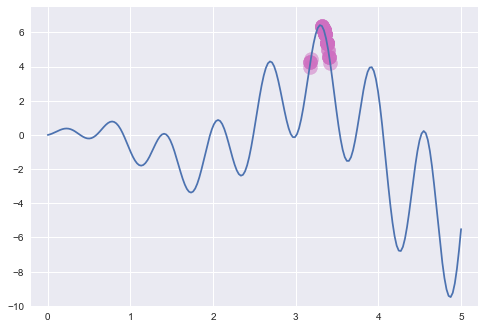

In [1]:
%matplotlib inline
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')


class GA:
    def __init__(self):
        self.pop_size = 80
        self.max_iter = 20
        self.pc = 0.6
        self.pm = 0.001
        self.dna_size = 10
        self.x_bound = [0, 5]

    def f(self, x):
        return np.sin(10 * x) * x + np.cos(2 * x) * x

    def encode(self, x):
        a = x / (self.x_bound[1] - self.x_bound[0]) * (2 ** self.dna_size - 1)
        a = int(a)
        return np.array(list(np.binary_repr(a).zfill(self.dna_size))).astype(np.uint8)

    def decode(self, per):
        return per.dot(1 << np.arange(self.dna_size)[::-1]) / (2**self.dna_size - 1) * self.x_bound[1]

    def perfit(self, per):
        x = self.decode(per)
        return self.f(x)

    def getfit(self, pop):
        x = self.decode(pop)
        r = self.f(x)
        return r

    def select(self, pop, fit):
        fit = fit - np.min(fit)
        fit = fit + np.max(fit) / 2 + 0.001
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fit / fit.sum())
        pop = pop[idx]
        return pop

    def crosso(self, pop):
        for i in range(0, self.pop_size, 2):
            if np.random.random() < self.pc:
                a = pop[i]
                b = pop[i + 1]
                p = np.random.randint(1, self.dna_size)
                a[p:], b[p:] = b[p:], a[p:]
                pop[i] = a
                pop[i + 1] = b
        return pop

    def mutate(self, pop):
        mut = np.random.choice(np.array([0, 1]), pop.shape, p=[1 - self.pm, self.pm])
        pop = np.where(mut == 1, 1 - pop, pop)
        return pop

    def evolve(self):
        pop = np.random.randint(2, size=(self.pop_size, self.dna_size))
        pop_fit = self.getfit(pop)
        yield pop, pop_fit
        for _ in range(self.max_iter - 1):
            chd = self.select(pop, pop_fit)
            chd = self.crosso(chd)
            chd = self.mutate(chd)
            chd_fit = self.getfit(chd)
            yield chd, chd_fit
            pop = chd
            pop_fit = chd_fit


ga = GA()
gaiter = ga.evolve()

fig, ax = plt.subplots()
ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-10, 7.5)
x = np.linspace(*ga.x_bound, 200)
ax.plot(x, ga.f(x))
sca = ax.scatter([], [], s=200, c='#CF6FC1', alpha=0.5)


def update(*args):
    pop, _ = next(gaiter)
    fx = ga.decode(pop)
    fv = ga.f(fx)
    sca.set_offsets(np.dstack((fx, fv))[0])


ani = matplotlib.animation.FuncAnimation(fig, update, interval=200, repeat=False)
#plt.show()

from IPython.display import HTML
HTML(ani.to_html5_video())

In [2]:
import numpy as np
a=np.array([[[1,2],[2,2]]])
a[0].shape

(2, 2)